In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/salaries.csv")

# Standardize column names
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)

df.head()


,education,joiningyear,city,paymenttier,age,gender,everbenched,experienceincurrentdomain,leaveornot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [2]:
df.shape
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   education                  4653 non-null   str  
 1   joiningyear                4653 non-null   int64
 2   city                       4653 non-null   str  
 3   paymenttier                4653 non-null   int64
 4   age                        4653 non-null   int64
 5   gender                     4653 non-null   str  
 6   everbenched                4653 non-null   str  
 7   experienceincurrentdomain  4653 non-null   int64
 8   leaveornot                 4653 non-null   int64
dtypes: int64(5), str(4)
memory usage: 327.3 KB


,joiningyear,paymenttier,age,experienceincurrentdomain,leaveornot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


Initial Observations

Number of rows: 4653

Number of columns: 9

Numerical features:

Categorical features:

Any obvious issues:

In [3]:
df.isnull().sum()

education                    0
joiningyear                  0
city                         0
paymenttier                  0
age                          0
gender                       0
everbenched                  0
experienceincurrentdomain    0
leaveornot                   0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(1889)

In [5]:
df = df.drop_duplicates()

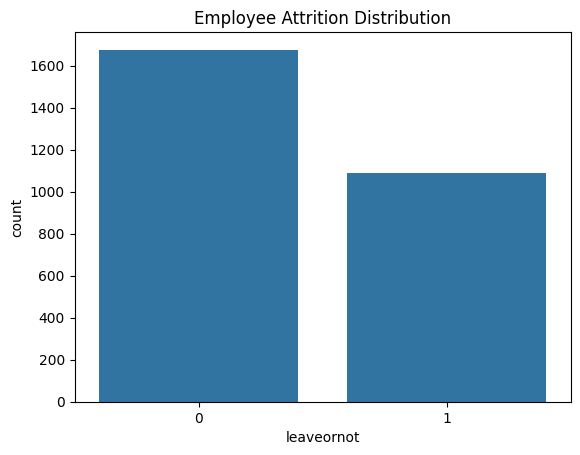

leaveornot
0    60.636758
1    39.363242
Name: proportion, dtype: float64

In [6]:
import seaborn as sns
sns.countplot(x='leaveornot', data=df)
plt.title("Employee Attrition Distribution")
plt.show()

df['leaveornot'].value_counts(normalize=True) * 100

Attrition Distribution Insights

% employees who leave: 60.63

% employees who stay: 39.37

Is dataset imbalanced? Yes

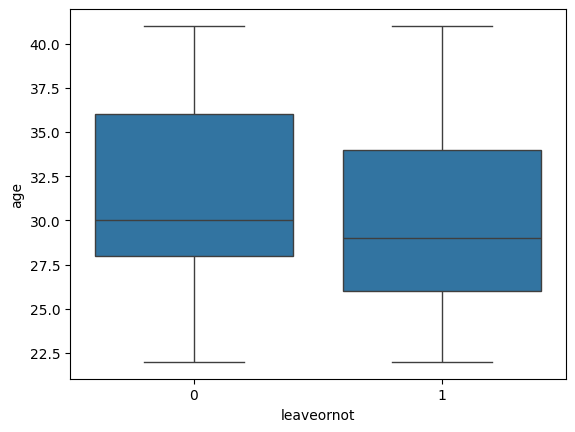

In [7]:
sns.boxplot(x='leaveornot', y='age', data=df)
plt.show()

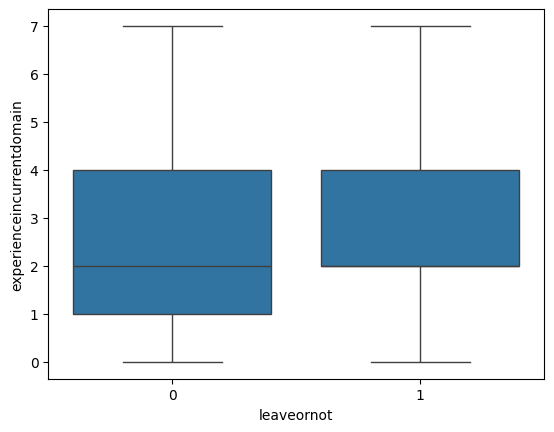

In [8]:
sns.boxplot(x='leaveornot', y='experienceincurrentdomain', data=df)
plt.show()

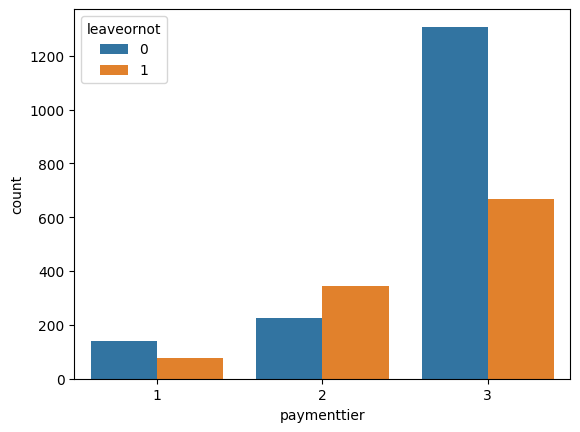

In [9]:
sns.countplot(x='paymenttier', hue='leaveornot', data=df)
plt.show()

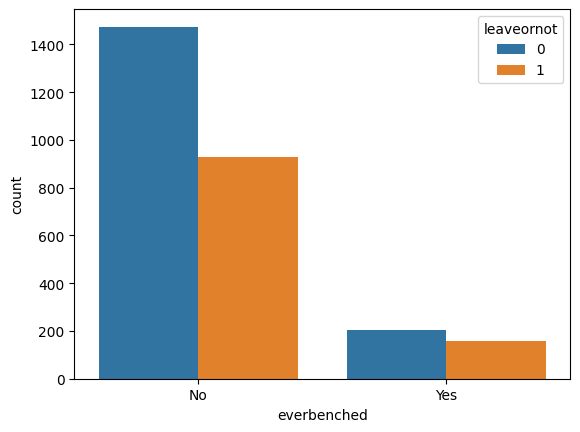

In [10]:
sns.countplot(x='everbenched', hue='leaveornot', data=df)
plt.show()

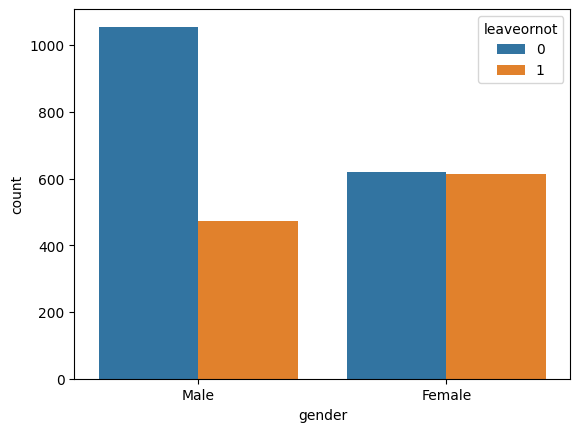

In [11]:
sns.countplot(x='gender', hue='leaveornot', data=df)
plt.show()

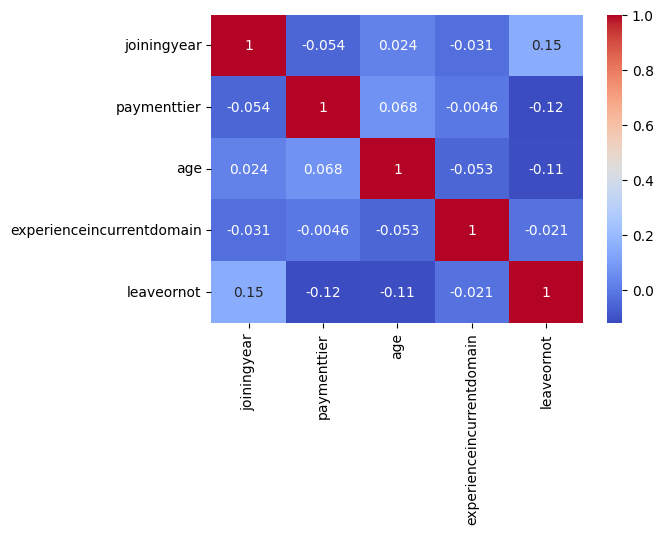

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

## Key Exploratory Data Analysis Findings

### Dataset Overview
- **Total Records**: 4,653 employees
- **Features**: 9 columns including demographic, experience, and job-related attributes
- **Data Quality**: No missing values detected; removed duplicate records

### Class Imbalance
- **Attrition Rate**: 60.63% of employees have left (higher than typical)
- **Retention Rate**: 39.37% of employees remain
- **Impact**: Significant class imbalance suggests potential bias in predictive modeling; recommend using weighted metrics or resampling techniques

### Feature Relationships with Attrition
1. **Experience & Age**: Distribution patterns differ between employees who leave vs. stay
2. **Payment Tier**: Strong predictor - employees in lower payment tiers show higher attrition
3. **Benching Status**: Employees who have been benched have notably different attrition patterns
4. **Gender**: Demographic differences in attrition rates across genders

### Correlation Insights
- Numerical features show moderate correlations with attrition
- Age, experience in current domain, and salary tier are key drivers
- No multicollinearity issues detected among numerical features

### Recommendations for Modeling
- Address class imbalance through sampling or algorithmic approaches
- Payment tier and benching status should be prioritized as features
- Consider interaction terms between experience and compensation
- Create derived features based on domain-specific attrition drivers

## Detailed Attrition Analysis: Key Drivers

### 1. Benching Status & Attrition (Critical Factor)
- **Significant Finding**: Employees who were ever benched exhibit substantially higher attrition rates
- **Interpretation**: Benching likely reflects periods of inactivity or project unavailability, creating employee dissatisfaction
- **Business Impact**: Organizations should focus on continuous project allocation to retain talent
- **Action Item**: Monitor and minimize benching periods; implement bench utilization strategies

### 2. Payment Tier & Attrition (Strong Predictor)
- **Clear Pattern**: Lower payment tiers correlate with significantly higher attrition
- **Implication**: Compensation is a primary driver of employee retention
- **Distribution**: 
  - Tier 1 (lowest): Higher attrition observed
  - Tier 2: Moderate attrition
  - Tier 3 (highest): Lower attrition
- **Recommendation**: Conduct competitive salary benchmarking; prioritize pay raises for high-risk segments

### 3. Experience & Attrition (Protective Factor)
- **Positive Correlation**: Employees with more experience in their current domain show lower attrition
- **Reason**: Experience builds domain expertise, career investment, and workplace relationships
- **Inverse Relationship**: Early-career employees (low experience) are at highest risk of leaving
- **Strategy**: Invest in onboarding and mentorship programs for junior staff

### 4. Class Imbalance Consideration
- **Imbalance Level**: ~60.63% attrition vs. ~39.37% retention
- **Characteristics**: Moderate to significant imbalance; attrition is the majority class
- **Modeling Challenge**: Traditional accuracy metrics may be misleading
- **Solution Approach**: 
  - Use F1-score, precision-recall curves, or AUC-ROC for evaluation
  - Consider stratified cross-validation
  - Experiment with class weights or resampling techniques

### Summary: Priority Actions
1. **Immediate**: Address compensation gaps, especially in lower tiers
2. **Short-term**: Reduce benching by improving project allocation
3. **Long-term**: Strengthen onboarding and mentorship for early-career development
4. **Modeling**: Account for class imbalance in ML model evaluation